# 16장 컨조인트 분석

## 16.3 컨조인트 분석 실습
### 분석 시나리오

앞서 컨조인트 분석 과정에서 예시한 이동통신사의 요금제에 대한 소비자 선호도 조사 결과를 실제 컨조인트 분석을 통해 살펴보자. 앞에서 예시한 요금제 구성의 속성과 속성수준을 다시 요약하면 다음과 같다. 
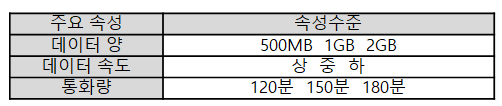



상기 속성에 대한 속성 수준을 조합하여 선택 대안을 만들 경우 총 27가지의 대안이 가능하지만, 소비자의 선호도 판단을 용이하게 하기 위해 라틴 방격법을 이용하여 총 9가지의 주요 선택 대안만을 사용하기로 하였다.
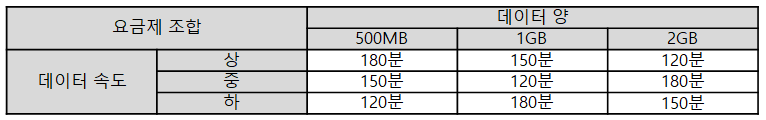
이러한 9가지 선택대안을 바탕으로 소비자 50명을 통해 선호도 조사를 수행하였고, 이 수집 데이터를 바탕으로 컨조인트 분석을 수행한다 

In [1]:
#1. 모듈 및 데이터 탑재
import pandas as pd
df = pd.read_csv('conjoint.csv', sep=',', encoding='CP949')
df

,NO,데이터양,데이터속도,통화량,전체평균,응답자1,응답자2,응답자3,응답자4,응답자5,...,응답자41,응답자42,응답자43,응답자44,응답자45,응답자46,응답자47,응답자48,응답자49,응답자50
0,1,500MB,상,180분,5.02,8,8,8,5,3,...,5,3,1,7,1,2,8,8,8,5
1,2,500MB,중,150분,4.06,2,5,4,4,5,...,4,5,2,8,2,4,2,5,4,4
2,3,500MB,하,120분,4.80,1,2,3,6,7,...,6,7,3,9,3,9,1,2,3,6
3,4,1GB,상,150분,4.72,7,7,7,3,6,...,3,6,4,5,5,1,7,7,7,3
4,5,1GB,중,120분,5.10,9,4,6,2,8,...,2,8,5,6,6,6,9,4,6,2
5,6,1GB,하,180분,2.94,3,1,2,1,1,...,1,1,6,4,4,8,3,1,2,1
6,7,2GB,상,120분,7.38,6,9,9,9,9,...,9,9,7,3,9,3,6,9,9,9
7,8,2GB,중,180분,5.72,5,6,5,8,2,...,8,2,8,1,7,5,5,6,5,8
8,9,2GB,하,150분,5.26,4,3,1,7,4,...,7,4,9,2,8,7,4,3,1,7


In [4]:
#1. 패키지 불러오기.
import statsmodels.api as sm
from sympy import *

#2. 속성수준 더미변수생성 및 독립변수 객체 생성
con_df =pd.get_dummies(df,columns=['데이터양','데이터속도','통화량'], drop_first=False)
con_df['intercept'] = 1.0
X = con_df[['intercept','데이터양_1GB','데이터양_2GB','데이터속도_중','데이터속도_상','통화량_150분','통화량_180분']]

#3. 개별 응답자의 속성수준 효용가치 계산하기
res = []
intercept = []
for i in range(50):
    Y = con_df[con_df.columns[2:52][i]] # 응답자1~50까지 반복
    LR1 = sm.OLS(Y, X).fit()

#3-1 연립방정식을 이용한 응답자의 속성수준별 효용가치 계산 
    x, y, z= symbols('a_1 a_2 a_3')
    a1=solve( [ Eq(x-z,LR1.params[1]), Eq(y-z,LR1.params[2]), Eq(x+y+z,0)], [x,y,z] )
    x, y, z = symbols('b_1 b_2 b_3')
    b1=solve( [ Eq(x-z,LR1.params[3]), Eq(y-z,LR1.params[4]), Eq(x+y+z,0)], [x,y,z] )
    x, y, z = symbols('c_1 c_2 c_3')
    c1=solve( [ Eq(x-z,LR1.params[5]), Eq(y-z,LR1.params[6]), Eq(x+y+z,0)], [x,y,z] )

#3-2 속성수준 효용가치 병합
    a_1=list(a1.values())
    b_1=list(b1.values())
    c_1=list(c1.values())
    a_1.extend(b_1)
    a_1.extend(c_1)
    res.append(a_1)
    d_1=LR1.params[0]
    intercept.append(d_1)

#4. 데이터프레임으로 전환 후 출력 
result =pd.DataFrame(res)
result.columns=['데이터양_1GB', '데이터양_2GB', '데이터양_500MB', '데이터속도_중','데이터속도_상', '데이터속도_하', '통화량_150분', '통화량_180분','통화량_120분']
print(result.shape)
result.head()

(50, 9)


,데이터양_1GB,데이터양_2GB,데이터양_500MB,데이터속도_중,데이터속도_상,데이터속도_하,통화량_150분,통화량_180분,통화량_120분
0,1.33333333333333,0.0,-1.33333333333333,0.333333333333333,2.00000000000000,-2.33333333333333,-0.666666666666666,0.333333333333333,0.333333333333334
1,-1.00000000000000,1.00000000000000,0.0,0.0,3.00000000000000,-3.00000000000000,1.99840144432528e-15,-1.55431223447522e-15,-4.44089209850060e-16
2,8.88178419700127e-16,-1.77635683940025e-15,8.88178419700127e-16,0.0,3.00000000000000,-3.00000000000000,-1.00000000000000,0.0,1.00000000000000
3,-3.00000000000000,3.00000000000000,0.0,-0.333333333333335,0.666666666666667,-0.333333333333333,-0.333333333333333,-0.333333333333333,0.666666666666667
4,3.70074341541719e-16,-2.96059473233375e-16,-7.40148683083440e-17,0.0,1.00000000000000,-1.00000000000000,0.0,-3.00000000000000,3.00000000000000


In [5]:
#1. 패키지 불러오기
import numpy as np

#2. 대안별 더미변수 상태 행렬 생성
con_df2=con_df[['데이터양_1GB', '데이터양_2GB', '데이터양_500MB', '데이터속도_중','데이터속도_상', '데이터속도_하', '통화량_150분', '통화량_180분','통화량_120분']]

#3. 대안별 응답자들의 효용가치 계산
alt1 = []
for i in range(0,9,1):
    alt1.append(con_df2.loc[i])
alt2 = []
for i in range(0,9,1):
    for k in range(0,50,1):
        alt2.append(np.dot(alt1[i], result.loc[k]))

#4. 개별응답자의 대안별 효용가치 데이터프레임 생성
cust_Utility = []
for i in range(0,401,50):
    cust_Utility.append(alt2[i:i+50])
cust_Utility = pd.DataFrame(cust_Utility).T
cust_Utility.columns = ['대안1','대안2','대안3','대안4','대안5','대안6','대안7','대안8','대안9']
cust_Utility=cust_Utility+np.array(intercept).mean()    
print(cust_Utility.shape)
print('개별응답자의 대안별 효용가치\n', cust_Utility.head())


(50, 9)
개별응답자의 대안별 효용가치
                 대안1               대안2               대안3               대안4  \
0  5.72000000000000  3.05333333333333  1.38666666666667  7.38666666666666   
1  7.72000000000000  4.72000000000000  1.72000000000000  6.72000000000000   
2  7.72000000000000  3.72000000000000  2.72000000000000  6.72000000000000   
3  5.05333333333333  4.05333333333333  5.05333333333333  2.05333333333333   
4  2.72000000000000  4.72000000000000  6.72000000000000  5.72000000000000   

                대안5                대안6               대안7               대안8  \
0  6.72000000000000   4.05333333333333  7.05333333333333  5.38666666666666   
1  3.72000000000000  0.719999999999997  8.72000000000000  5.72000000000000   
2  5.72000000000000   1.72000000000000  8.72000000000000  4.72000000000000   
3  2.05333333333333   1.05333333333333  9.05333333333333  7.05333333333333   
4  7.72000000000000  0.719999999999999  8.72000000000000  1.72000000000000   

                 대안9  
0   1.72000000000000

In [6]:
#1. 대안별 평균 효용가치 계산 및 최적 대안 찾기
alt_mean = pd.DataFrame(cust_Utility.mean(), columns=['효용가치'])
alt_mean['Rank'] = alt_mean['효용가치'].rank(ascending=False)
print('\n대안별 효용가치 순위\n ', alt_mean.sort_values(by=['Rank'],ascending=True))

#2. 속성별 중요도 및 효용가치계산
a_dif = max(result.mean()[0:3])-min(result.mean()[0:3])
b_dif = max(result.mean()[3:6])-min(result.mean()[3:6])
c_dif = max(result.mean()[6:9])-min(result.mean()[6:9])
print('\n데이터양 중요도 :',round(a_dif/(a_dif+b_dif+c_dif)*100,2))
print('데이터속도 중요도 :',round(b_dif/(a_dif+b_dif+c_dif)*100,2))
print('통화량 중요도 :',round(c_dif/(a_dif+b_dif+c_dif)*100,2))
print('\n데이터양 효용가치(1GB, 2GB, 500MB) :\n', result.mean()[0:3])
print('\n데이터속도 효용가치(중, 상, 하) :\n', result.mean()[3:6])
print('\n통화량 효용가치(150분, 180분, 120분) :\n',result.mean()[6:9])


대안별 효용가치 순위
           효용가치  Rank
대안7  7.306667   1.0
대안8  5.360000   2.0
대안9  4.853333   3.0
대안5  4.693333   4.0
대안1  4.613333   5.0
대안3  4.440000   6.0
대안4  4.360000   7.0
대안2  3.986667   8.0
대안6  2.866667   9.0

데이터양 중요도 : 42.04
데이터속도 중요도 : 30.93
통화량 중요도 : 27.03

데이터양 효용가치(1GB, 2GB, 500MB) :
 데이터양_1GB     -0.746667
데이터양_2GB      1.120000
데이터양_500MB   -0.373333
dtype: float64

데이터속도 효용가치(중, 상, 하) :
 데이터속도_중   -0.040000
데이터속도_상    0.706667
데이터속도_하   -0.666667
dtype: float64

통화량 효용가치(150분, 180분, 120분) :
 통화량_150분   -0.32
통화량_180분   -0.44
통화량_120분    0.76
dtype: float64


In [7]:
#1. 9가지 대안에 대한 개별응답자의 최대선호 계산
pre1=[]
for i in range(0,50,1):
    market_sum1 = np.where(cust_Utility.loc[i].values == cust_Utility.loc[i].max(), 1, 0)
    pre1.append(market_sum1)
MAX=pd.DataFrame(pre1)
MAX.columns=cust_Utility.columns
print('9가지 선택 대안에 대한 최대선호 현황:\n', MAX)

#2. 최대선호 모형을 이용한 시장점유율 예측
pre2=[]
for i in range(0,9,1):
    MAX_sum1=MAX.iloc[:,i].sum()
    pre2.append(MAX_sum1)
prefer=pd.DataFrame(pre2).T
prefer.columns=cust_Utility.columns
print('\n최대선호 모형을 이용한 예측 시장점유율\n',prefer/50*100)

9가지 선택 대안에 대한 최대선호 현황:
     대안1  대안2  대안3  대안4  대안5  대안6  대안7  대안8  대안9
0     0    0    0    1    0    0    0    0    0
1     0    0    0    0    0    0    1    0    0
2     0    0    0    0    0    0    1    0    0
3     0    0    0    0    0    0    1    0    0
4     0    0    0    0    0    0    1    0    0
5     0    0    0    0    0    0    0    0    1
6     0    0    1    0    0    0    0    0    0
7     0    0    0    0    0    0    1    0    0
8     0    0    1    0    0    0    0    0    0
9     0    0    0    0    0    0    1    0    0
10    0    0    0    0    0    0    0    0    1
11    1    0    0    0    0    0    0    0    0
12    0    0    0    0    0    0    1    0    0
13    0    0    0    1    0    0    0    0    0
14    0    0    0    0    0    0    1    0    0
15    0    0    0    0    0    0    1    0    0
16    0    0    0    0    0    0    1    0    0
17    0    0    0    0    0    0    1    0    0
18    0    0    0    0    0    0    0    0    1
19    0    0    

In [8]:
#1. 개별응답자의 9가지 선택 대안에 대한 선택확률
pro1=[]
for i in range(0,50,1):
    market_sum2=cust_Utility.loc[i]/cust_Utility.loc[i].sum()
    pro1.append(market_sum2)
select = round(pd.DataFrame(pro1).astype(float),3) 
select.columns=cust_Utility.columns
print('9가지 선택 대안에 대한 선택확률 현황:\n',select)

#2. 9가지 선택 대안에 대한 개별 고객들의 시장점유율
pro2=[]	
for i in range(0,9,1):
    select_sum3=select.iloc[:,i].sum()
    pro2.append(select_sum3)
select2=round(pd.DataFrame(pro2).astype(float).T,3)
select2.columns=cust_Utility.columns
print('\n선택확률 모형을 이용한 시장점유율 예측\n', select2/50*100)

9가지 선택 대안에 대한 선택확률 현황:
       대안1    대안2    대안3    대안4    대안5    대안6    대안7    대안8    대안9
0   0.135  0.072  0.033  0.174  0.158  0.095  0.166  0.127  0.040
1   0.182  0.111  0.040  0.158  0.088  0.017  0.205  0.135  0.064
2   0.182  0.088  0.064  0.158  0.135  0.040  0.205  0.111  0.017
3   0.119  0.095  0.119  0.048  0.048  0.025  0.213  0.166  0.166
4   0.064  0.111  0.158  0.135  0.182  0.017  0.205  0.040  0.088
5   0.017  0.040  0.064  0.088  0.111  0.135  0.158  0.182  0.205
6   0.158  0.182  0.205  0.111  0.135  0.088  0.064  0.017  0.040
7   0.017  0.040  0.064  0.111  0.135  0.088  0.205  0.158  0.182
8   0.040  0.088  0.205  0.017  0.135  0.182  0.064  0.111  0.158
9   0.119  0.095  0.119  0.048  0.048  0.025  0.213  0.166  0.166
10  0.017  0.040  0.064  0.088  0.111  0.135  0.158  0.182  0.205
11  0.205  0.182  0.158  0.064  0.040  0.017  0.135  0.111  0.088
12  0.119  0.095  0.119  0.048  0.048  0.025  0.213  0.166  0.166
13  0.135  0.072  0.033  0.174  0.158  0.095  0.166 